Recurrent Neural Networks for Sentiment Analysis. We will use the Product Reviews dataset which has around 25000 customer reviews. Our end goal will be to give a rating according to the review given.

### Sentiment Analysis using RNN
Sentiment Analysis is the process of extracting information from the texts. It involves various steps of Natural Language Processing like, text cleaning, text vectorization, stemming, lemmatization, and many more. We will use the above mentioned steps to finally generate a model that can give rating predictions to the reviews.

Recurrent Neural Networks are a type of neural network which uses previous information to give output. We will use RNN with different setups to get maximum accuracy. Further, we will also use LSTM (Long Short Term Memory) which is an extension to RNN, to further increase the accuracy.

### Dataset
We’ve used the dataset i.e. Consumer Reviews of Products. The dataset contains information like reviews and ratings.

### Step 1: Importing necessary Libraries



In [2]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 7.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 2.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 1.9 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 500.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 192.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 480.3 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.6/786.6 kB 3.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 959.0 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 668.1 kB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import re 
import seaborn as sns 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import tensorflow as tf 
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, Embedding, BatchNormalization 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.utils import pad_sequences 

import warnings 
warnings.filterwarnings('ignore')


2024-08-20 10:36:32.749171: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 2: Loading the dataset
The Amazon dataset contains 25000 customer reviews on Amazon products. Here is how we can load the dataset and get information on it.


In [22]:
data = pd.read_csv('AmazonReview.csv') 

# Printing shape of the dataset 
print(data.shape) 
# printing columns and rows information 
print(data.info())


(25000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


From the above output, we can see that the dataset is of the shape (25000, 2), which shows that it has 25000 rows and 2 columns.

# Step 3: Exploratory Data Analysis
1. As we’ve to just get a sentiment analysis of reviews, so let’s extract useful information from the dataset. Also, let’s look at how many null values are present in this dataset.

In [10]:
# looking for NULL values 
print("Null Values:\n", data.isna().sum()) 

# dropping null values 
data = data.dropna() 

# again checking for NULL values 
print("Null Values after dropping:\n", data.isna().sum())


Null Values:
 Review       1
Sentiment    0
dtype: int64
Null Values after dropping:
 Review       0
Sentiment    0
dtype: int64


Let’s take a look at the number of values of each unique item in the Sentiment column.

In [11]:
# count of unique values in Sentiment column 
data['Sentiment'].value_counts()


Sentiment
1    5000
2    5000
3    5000
4    5000
5    4999
Name: count, dtype: int64

### 2. Text Cleaning: In this step, we will clean the ‘reviews.text’ column. We will remove the unwanted HTML tags, brackets, or special characters that may be present in the texts. We will use Regex to clean the text.

In [ ]:
import nltk
nltk.download('punkt')  # Make sure to run this line once to download the tokenizer
nltk.download('punkt_tab')  # Make sure to run this line once to download the tokenizer


print(nltk.data.find('tokenizers/punkt'))

In [27]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure 'punkt' is downloaded
nltk.download('punkt')

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to clean reviews
def clean_reviews(text): 
    if isinstance(text, str):  # Check if the text is a string
        text = text.lower()  # Convert to lower case
        text = word_tokenize(text)  # Tokenization of words
        text = [word for word in text if word not in stop_words]  # Stop words removal
    else:
        text = []  # Handle non-string or NaN values as empty list
    return text 

# Handle non-string values in the 'Review' column
data['Review'] = data['Review'].astype(str)  # Convert all to strings
data['Review'] = data['Review'].fillna('')   # Fill NaN values with empty strings

# Apply the cleaning function
data['Review'] = data['Review'].apply(clean_reviews)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 4. Tokenization & Text Encoding: In this step, we will use tokenization to first generate the tokens. For this, we will use Tokenizer from the Tensorflow library. And we will encode the text using the same.

We have around 5 unique values in the ‘reviews.rating’ column. So let’s use one-hot encoding to represent each value in the rating as separate columns.

Also, in this step, we have initialized X(input) and y(output) to the model.

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd

# Initialize the tokenizer
tokenizer = Tokenizer() 

# Convert all the reviews to a list to pass it as a parameter to fit_on_texts 
reviews_to_list = data['Review'].tolist() 
tokenizer.fit_on_texts(reviews_to_list) 

# Generate text sequences (list of lists)
text_sequences = tokenizer.texts_to_sequences(reviews_to_list)

# Set the maximum number of words in a sequence
max_words = 500

# Pad sequences to ensure they all have the same length
X = pad_sequences(text_sequences, maxlen=max_words)

# One hot encoding the Sentiment column
data = pd.get_dummies(data, columns=['Sentiment'])

# Generate the output labels y
y = data[['Sentiment_1', 'Sentiment_2', 'Sentiment_3', 'Sentiment_4', 'Sentiment_5']] 

# Print the shapes of X and y
print(X.shape, y.shape)


(25000, 500) (25000, 5)


### 5. Train-Test Split: In this step, we will split our dataset into training and testing datasets. We will split the dataset into 80-20%, i.e. 80% for the training and 20% for testing.

In [33]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 249.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 7.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 5.9 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Tokenization
tokenizer = Tokenizer()
reviews_to_list = data['Review'].tolist()
tokenizer.fit_on_texts(reviews_to_list)
text_sequences = tokenizer.texts_to_sequences(reviews_to_list)

# Padding sequences
max_words = 500
X = pad_sequences(text_sequences, maxlen=max_words)

# The sentiment columns are already one-hot encoded, so we don't need to apply pd.get_dummies again
# Generate the output labels y
y = data[['Sentiment_1', 'Sentiment_2', 'Sentiment_3', 'Sentiment_4', 'Sentiment_5']]

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(20000, 500) (5000, 500) (20000, 5) (5000, 5)


### Step 4: Model Building, Compiling andLet’s Training

### 1. Build the Model: In this step, let’s build our model using RNN.



In [38]:
# Creating a RNN model 
rnn = Sequential(name="Simple_RNN") 
rnn.add(Embedding(len(tokenizer.word_index)+1, 
						max_words, 
						input_length=max_words)) 

rnn.add(SimpleRNN(128,activation='relu',return_sequences=True)) 

rnn.add(SimpleRNN(64,activation='relu',return_sequences=False)) 

rnn.add(Dense(5, activation='softmax')) 

# printing model summary 
print(rnn.summary())


Model: "Simple_RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


### 2. Compiling the model and Model Evaluation: Let’s compile and train the model we defined in the above step. Then we will see the accuracy of the model on the test dataset.

In [39]:
# Compiling model 
rnn.compile( 
	loss="categorical_crossentropy", 
	optimizer='adam', 
	metrics=['accuracy'] 
) 

# Training the model 
history = rnn.fit(X_train, y_train, 
						batch_size=64, 
						epochs=2, 
						verbose=1, 
						validation_data = (X_test, y_test)) 

# Printing model score on test data 
print("Simple_RNN Score---> ", rnn.evaluate(X_test, y_test, verbose=1))


Epoch 1/2


2024-08-20 11:24:33.984805: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 70504000 exceeds 10% of free system memory.
2024-08-20 11:24:34.031924: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 70504000 exceeds 10% of free system memory.
2024-08-20 11:24:34.185726: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 70504000 exceeds 10% of free system memory.
2024-08-20 11:24:34.244833: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 70504000 exceeds 10% of free system memory.
2024-08-20 11:24:34.294549: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 70504000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 216s 675ms/step - accuracy: 0.2272 - loss: 1.5957 - val_accuracy: 0.3062 - val_loss: 1.5044
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 218s 696ms/step - accuracy: 0.3429 - loss: 1.4560 - val_accuracy: 0.3592 - val_loss: 1.4049
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.3634 - loss: 1.3949
Simple_RNN Score--->  [1.404873013496399, 0.35920000076293945]


Text(0, 0.5, 'Loss')

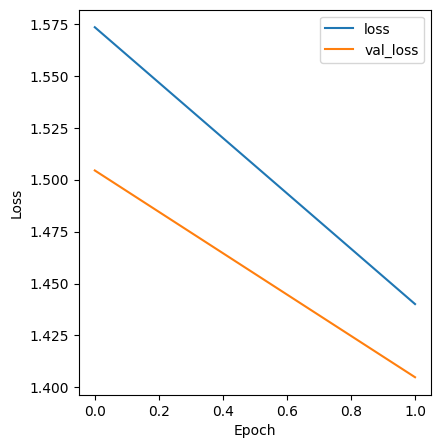

In [42]:
metrics = history.history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')



Text(0, 0.5, 'Accuracy')

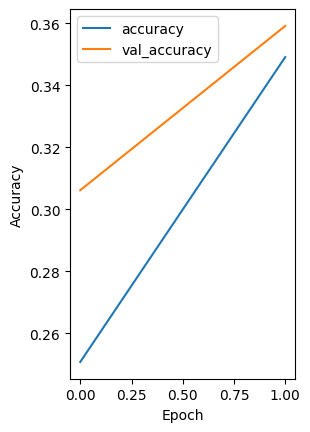

In [43]:
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


Thus we’ve got an accuracy of 40% while using RNN.
## LSTM ( Long Short Term Memory)
Let’s use LSTM and see how the model performance is changing. We will simply start with defining the model, compiling and then training. To understand the theoretical aspects of LSTM please visit this article Long Short Term Memory Networks Explanation. 

In [ ]:
model = Sequential(name="LSTM_Model") 
model.add(Embedding(len(tokenizer.word_index)+1, 
					max_words, 
					input_length=max_words)) 

# adding a LSTM layer 
model.add(LSTM(150, return_sequences=False)) 
BatchNormalization() 
model.add(Dropout(0.5)) 

#adding a dense layer with activation function of relu 
model.add(Dense(50, activation='relu')) 
BatchNormalization() 
model.add(Dropout(0.5)) 

# adding the final output activation with activation function of softmax 
model.add(Dense(5, activation='softmax')) 

# printing model summary 
print(model.summary())


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and limit the vocabulary size
tokenizer = Tokenizer(num_words=5000)
reviews_to_list = data['Review'].tolist()
tokenizer.fit_on_texts(reviews_to_list)
text_sequences = tokenizer.texts_to_sequences(reviews_to_list)

# Determine vocabulary size (if not limiting)
vocab_size = len(tokenizer.word_index) + 1  # Consider increasing this if needed

# Padding sequences
X = pad_sequences(text_sequences, maxlen=500)

# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=500))
model.add(GRU(units=128, return_sequences=False))
model.add(Dense(units=5, activation='softmax'))

# Compile the model
model.compile(
    loss="categorical_crossentropy", 
    optimizer='adam', 
    metrics=['accuracy']
)

# Train the model
history = model.fit(X_train, y_train, 
                    batch_size=64, 
                    epochs=3, 
                    verbose=1, 
                    validation_data=(X_test, y_test))

# Evaluate the model
print("GRU model Score---> ", model.evaluate(X_test, y_test, verbose=1))


Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 206s 652ms/step - accuracy: 0.2354 - loss: 1.5885 - val_accuracy: 0.3750 - val_loss: 1.3887
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 193s 615ms/step - accuracy: 0.3876 - loss: 1.3890 - val_accuracy: 0.4624 - val_loss: 1.2212
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 188s 599ms/step - accuracy: 0.5532 - loss: 1.0508 - val_accuracy: 0.4776 - val_loss: 1.2100
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.4801 - loss: 1.2044
GRU model Score--->  [1.2099543809890747, 0.47760000824928284]


Thus we got the final accuracy of 48% using LSTM. Let’s take a look at the classification report of this LSTM model.

### Classification Report

Text(0, 0.5, 'Accuracy')

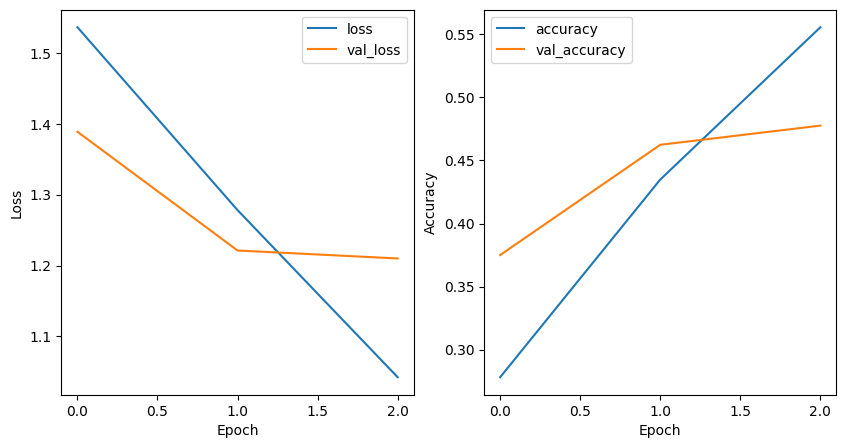

In [47]:
# Plotting the history 
metrics = history.history 
plt.figure(figsize=(10, 5)) 
	
# Plotting training and validation loss 
plt.subplot(1, 2, 1) 
plt.plot(history.epoch, metrics['loss'], metrics['val_loss']) 
plt.legend(['loss', 'val_loss']) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
	
# Plotting training and validation accuracy 
plt.subplot(1, 2, 2) 
plt.plot(history.epoch, metrics['accuracy'], 
		metrics['val_accuracy']) 
plt.legend(['accuracy', 'val_accuracy']) 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step


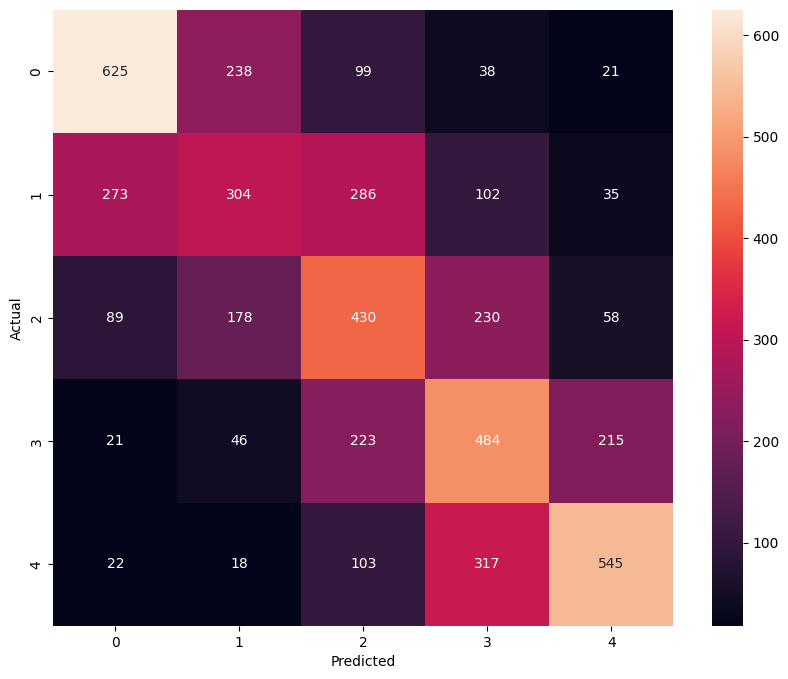

In [48]:
# converting y_test tht was one hot encoded to one column fo rconfusion matrix 
y_true = np.argmax(y_test.values, axis=1) 
y_true.shape 

# Confusion matrix 
y_pred = np.argmax(model.predict(X_test), axis=1) 
cm = tf.math.confusion_matrix(y_true, y_pred) 
	
# Plotting the confusion matrix 
plt.figure(figsize=(10, 8)) 
sns.heatmap(cm, annot=True, fmt='g') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()


In [49]:
from sklearn.metrics import classification_report 
report = classification_report(y_true, y_pred) 
print(report)


              precision    recall  f1-score   support

           0       0.61      0.61      0.61      1021
           1       0.39      0.30      0.34      1000
           2       0.38      0.44      0.40       985
           3       0.41      0.49      0.45       989
           4       0.62      0.54      0.58      1005

    accuracy                           0.48      5000
   macro avg       0.48      0.48      0.48      5000
weighted avg       0.48      0.48      0.48      5000



### Testing the trained model
Let’s take a look at how the model is performing on the text we give in. For this make a custom function in which we will pass out text and it will generate the rating using the model.

In [51]:
def predict_review_rating(text):
    # Tokenize the input text
    text_sequences_test = tokenizer.texts_to_sequences([text])
    
    # Pad the sequence to ensure it matches the input length expected by the model
    testing = pad_sequences(text_sequences_test, maxlen=max_words)
    
    # Predict the rating (output class) using the trained model
    y_pred_test = np.argmax(model.predict(testing), axis=1)
    
    # Return the predicted rating
    return y_pred_test[0] + 1

# Testing the prediction function
rating1 = predict_review_rating('Worst product')
print("The rating according to the review is: ", rating1)

rating2 = predict_review_rating('Awesome product, I will recommend this to other users.')
print("The rating according to the review is: ", rating2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
The rating according to the review is:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The rating according to the review is:  1
